In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [2]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2018-12-22 13:39:07--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [0]:
from torch import nn
from torchvision import datasets,transforms
from torch import optim
import torch.nn.functional as F

In [0]:
# loading mnist dataset from torchvision module

# Defining a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),])

# Download and Load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/',download=True,train=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)


In [0]:
def create_train_nn(dataset):
  # Creating a dense neural network with 2 hidden layers to classify handwritten digits
  model = nn.Sequential(nn.Linear(784,128),
                       nn.ReLU(),
                       nn.Linear(128,64),
                       nn.ReLU(),
                       nn.Linear(64,10),
                       nn.LogSoftmax(dim=1))
  
  # creterion variable contains the loss function 
  criterion = nn.NLLLoss()
  # optimizer will update the weights based on the gradient calculated using backpropagation
  optimizer = optim.SGD(model.parameters(),lr=0.003)
  
  epochs = 5
  for e in range(epochs):
    running_loss = 0
    for images,labels in dataset:
      
      # Converting 28*28 pixel image to 784 pixel vector
      images = images.view(images.shape[0],-1)
      
      # Training Pass
      output = model.forward(images)
      loss = criterion(output,labels)
      loss.backward()
      optimizer.step()
      
      # Zero all the previous gradients before next pass
      optimizer.zero_grad()
      running_loss += loss.item()
      
    else:
        print(f"Training loss : {running_loss/len(trainloader)}")
  
  return model

Training loss : 1.8825741184037377
Training loss : 0.8390439773228631
Training loss : 0.5264712786242398
Training loss : 0.4360228638881559
Training loss : 0.3915441897409811


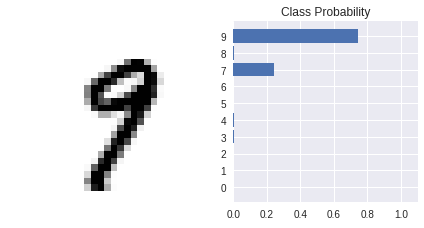

In [6]:
%matplotlib inline
import helper

images,labels = next(iter(trainloader))
img = images[0].view(1,784)

model = create_train_nn(trainloader)
#Turn off gradient to speed up this part
with torch.no_grad():
  logits = model.forward(img)
  
ps = F.softmax(logits,dim=1)
helper.view_classify(img.view(1,28,28),ps)